## Basic features

Welcome (back) to my WordGame notebook-series! In this notebook we will discover frequently used words and *word pairs* in online word association games. We will compute the term frequency (tf), document frequency (df), inverse document frequency (idf), a combination of both (tf-idf) and the frequency of word pairs. We will use pandas dataframes and mathplotlib with seaborn for nice visualizations of all features. 

### The Wordgame dataset
The Wordgame dataset contains word associations (e.g. green -> grass) scraped from 10 online word association games. 
<a href="https://www.kaggle.com/anneloes/wordgame">Read more</a>

### Dataset statistics

First we do the usual library imports and stuff. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # data visualization
#import pylab #pie?

from subprocess import check_output
#print(check_output(["ls", "../input/wordgame"]).decode("utf8"))

# color palette for nice plotting colors
pal = sns.color_palette("Paired", 10)

colors = ["pig pink", "fresh green", "olive", "light seafoam" , "green teal" , "spruce" , "cement", "dust", "petrol", "deep lilac"]
pal = sns.xkcd_palette(colors)
sns.palplot(sns.xkcd_palette(colors))
sns.palplot(sns.hls_palette(10, l=.3, s=.8))

# set the color palette as default (does not always work?)
sns.palplot(pal)
# use a bigger fontsize in the plots by default  
sns.set(font_scale=1.5)

Now, let's open up the dataset.

In [18]:
#df = pd.read_csv('../input/wordgame/wordgame_20170628.csv', dtype='object')
df = pd.read_csv('../data/processed/wordgame_20170721.csv', dtype='object')
df['sourceID'] = df['sourceID'].astype(int)

# read the list with source names
with open('../data/processed/sources.csv') as f:
    sources_list = f.read().splitlines()
print(sources_list)

#print first 5 rows
df.head()

['AC', 'BC', 'CC', 'ECF', 'GOG', 'LEF', 'SAS', 'TF', 'U2', 'WP']


,author,word1,word2,source,sourceID
0,1353,email,spam,GOG,4
1,1568,highlander,zweihander,GOG,4
2,4793,dictator,decision,U2,8
3,796,horse,cowboy,ECF,3
4,289,maudie,atticus,AC,0


When we look at the third row we see data from the online community GOG, which is the sixth source in alphabetical order and therefore has sourceID 4. At some point in time, a user (who now has unique ID 1353) saw 'email' as the most recently posted word and reacted by posting 'spam', which appearently was his association when he read the word 'email'. More information about the data and the 5 variables can be found the the <a href="https://www.kaggle.com/anneloes/wordgame">dataset description</a>.

In [ ]:
#print dataset dimensions
print("Dataset shape: " + str(df.shape))

#print number of sources
print("Number of sources: " + str(len(df['sourceID'].unique())))

We also see that the dataset contains 334036 rows and indeed 10 sources 

### How many word pairs?
Now we know the number of rows and sources, we can expect that on average each source contains 33403 rows. However, we all know that there exist really large online communities and also very small communities. A seaborn barplot can be used to clearly visualize these differences. First, we will create a list in containing all source names in alphabetical order and then plot the information in this order. Setting the order is an optional step, it is to avoid possible confusion caused by different orderings in different plots. We will also use the color palette we defined earlier. 

### How many authors and ... ?

In [34]:
# sizes of sources
N10 = df.source.value_counts().sort_index()

# (temporarily) drop duplicate author to obtain number of unique authors
a = df[['author','source']].drop_duplicates()[:]
A10 = a.source.value_counts().sort_index()

print("Number of unique authors: " + str(len(a)))

df['af'] = df.groupby(['author'])['author'].transform('count')

t = df[df['af']>34][:]
at = t[['author','source']].drop_duplicates()[:]
print("Number of unique authors: " + str(len(at)))
print(len(t))

#so at least 34; then mean is 304, median 109 and max is 12018 (let's reduce that..)
print(t.author.value_counts().max())
print(t.author.value_counts().median())
print(t.author.value_counts().mean())

Number of unique authors: 6335
Number of unique authors: 1006
306679
12018
109.0
304.849900596


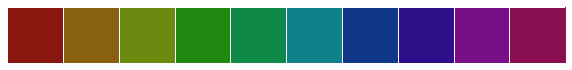

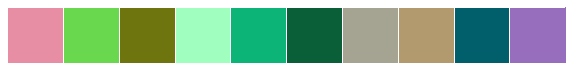

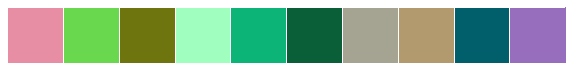

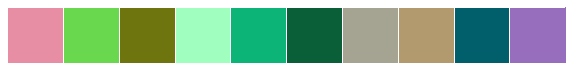

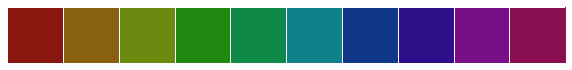

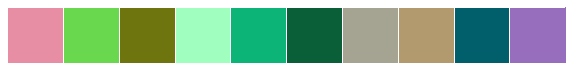

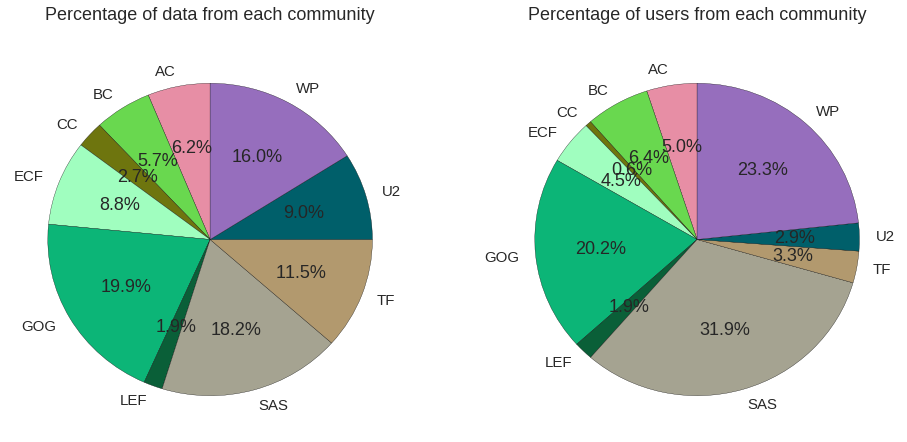

In [98]:
# plot a pie chart of the source sizes
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.pie(N10.tolist(), colors=pal, labels=N10.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of data from each community\n")

# plot a pie chart of the number of authors in each source 
plt.subplot(1,2,2)
plt.pie(A10.tolist(), colors=pal, labels=A10.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of users from each community\n")
plt.show()


SAS contributes to 18 of the data, however...

In [34]:
# to list..
N10 = N10.tolist()

[...]

### Frequent words
Term frequency
[...]

In [17]:
# frequency/count of word1 in de dataset
df['tf'] = df.groupby(['word1'])['word1'].transform('count')

#remove words only occuring once
df = df[df['tf']>1]
# normalized term frequency
df['tf'] = df['tf']/len(df)

freq = df.word1.value_counts().head(10)
tail = df.word1.value_counts().tail(20)
print(freq)

water    649
music    546
time     538
love     461
money    451
fire     444
food     438
house    407
game     405
dog      401
Name: word1, dtype: int64


In [99]:
freq = df.drop_duplicates(subset=['word1']).sort_values(by=['tf'], ascending=False).head(15)
freq_list = freq['word1'].tolist()
sample = df[df['word1'].isin(freq_list)].sort_values(by=['tf'], ascending=False)

# create crosstable
ct = pd.crosstab(sample.word1, sample.sourceID)
#ct = pd.DataFrame(ct)

# normalize value counts by number of words in source
for i in range(0,len(sources_list)):
    ct[i] = ct[i]/N10[i] 

ct.columns = sources_list
    
#Plot
ct.plot.barh(stacked=True, color=pal)
plt.show()

KeyError: 'tf'

#### Comparing sources
[...]

In [ ]:
def normTF10(r):
    return r.tf10/(N10[r.sourceID])

#term frequency 
df['tf10'] = df.groupby(['word1','source'])['word1'].transform('count')
# normalized term frequency
df['tf10'] = df.apply(normTF10, axis=1)

In [ ]:
plt.figure(figsize=(22, 8))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    freq = df[df['sourceID']==i].word1.value_counts().head(10)
#    frq_df = pd.DataFrame()
#    frq_df['word'] = freq.index
#    frq_df['count'] = freq.tolist()
    sns.barplot(freq.tolist(), freq.index, orient="h", color=pal[i])
    plt.title(sources_list[i])
    plt.xlabel('')
    plt.ylabel('')
plt.show()

In [78]:
freq = df.drop_duplicates(subset=['word1']).sort_values(by=['tf'], ascending=False).head(7)
freq_list = freq['word1'].tolist()
print(freq_list)

test = df[df['word1'].isin(freq_list)].drop_duplicates(subset=['word1','source']).sort_values(by=['tf'], ascending=False)

['water', 'music', 'time', 'love', 'money', 'fire', 'food']


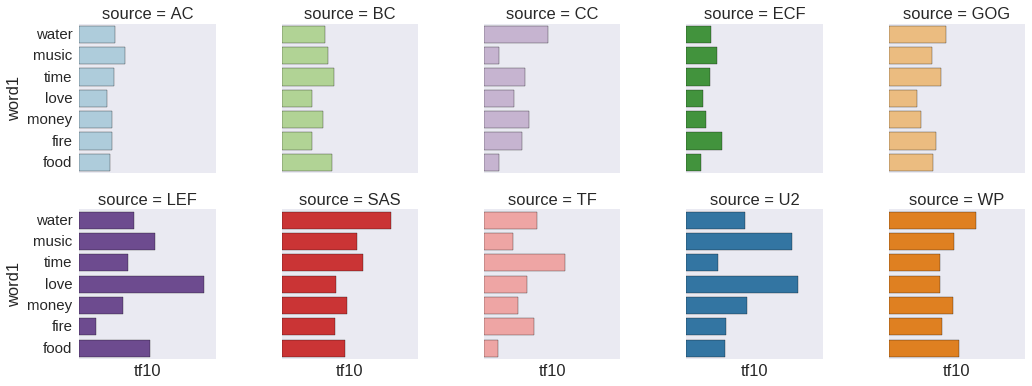

In [81]:
#plt.figure(figsize=(20,20))
g = sns.FacetGrid(test, col="source", col_wrap=5, hue="source", palette=pal, col_order=sources_list)#, size=6, aspect=0.5)  
g.map(sns.barplot, "tf10", "word1", orient="h")#, color=pal[i])#, n_levels=5, shade=True, cmap=cmapi)
g.set(xticks=[])
plt.show()

(keep in mind that LEF is very small so the overal tf only slightly is affected. 

[...]

### Document frequency
[...]

In [82]:
#create postings lists
aspieslist = (df['word1'][df['source']=="AC"]).unique().tolist()
atu2list = (df['word1'][df['source']=="U2"]).unique().tolist()
bleeplist = (df['word1'][df['source']=="BC"]).unique().tolist()
comicslist = (df['word1'][df['source']=="CC"]).unique().tolist()
eciglist = (df['word1'][df['source']=="ECF"]).unique().tolist()
goglist = (df['word1'][df['source']=="GOG"]).unique().tolist()
englishlist = (df['word1'][df['source']=="LEF"]).unique().tolist()
saslist = (df['word1'][df['source']=="SAS"]).unique().tolist()
fishlist = (df['word1'][df['source']=="TF"]).unique().tolist()
wronglist = (df['word1'][df['source']=="WP"]).unique().tolist()

df['df'] = (df['word1'].isin(aspieslist).astype(int) + df['word1'].isin(atu2list).astype(int) 
             + df['word1'].isin(bleeplist).astype(int) + df['word1'].isin(comicslist).astype(int)
             + df['word1'].isin(eciglist).astype(int) + df['word1'].isin(goglist).astype(int)
             + df['word1'].isin(englishlist).astype(int) + df['word1'].isin(saslist).astype(int)
             + df['word1'].isin(fishlist).astype(int) + df['word1'].isin(wronglist).astype(int))

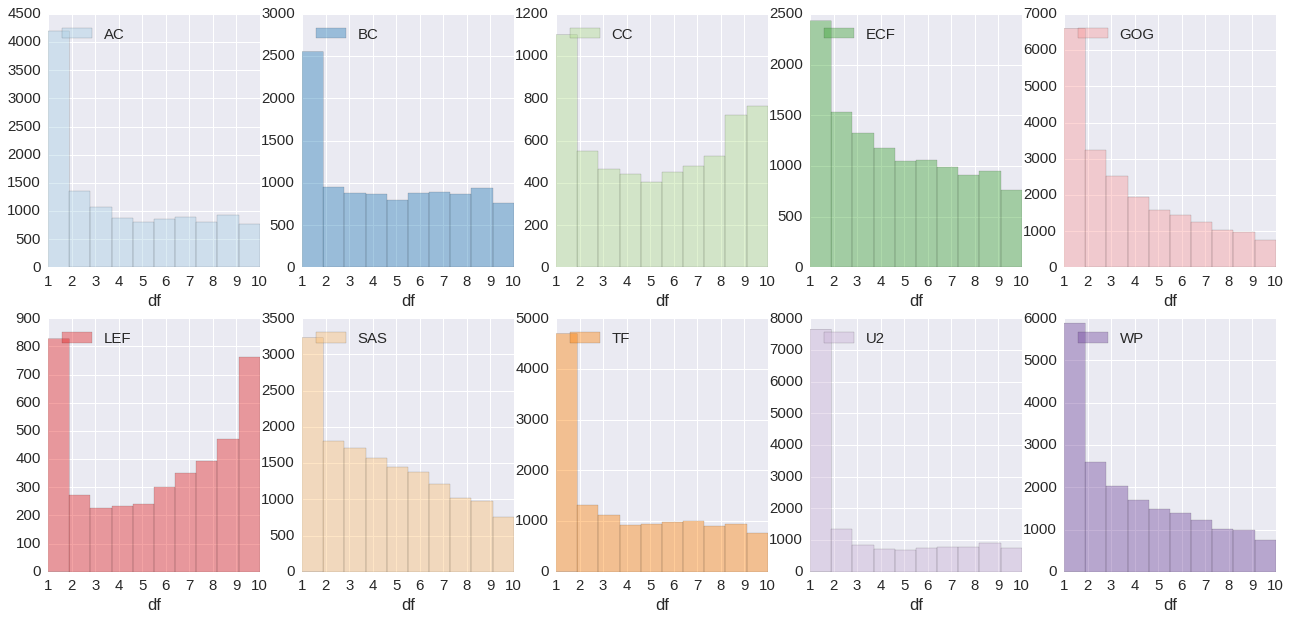

In [83]:
plt.figure(figsize=(22, 10))
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    s = df[df['sourceID']==i].drop_duplicates(subset=['word1'])
    g = sns.distplot(s['df'], bins=10, label=sources_list[i], kde=False, color=pal[i])
    plt.legend(loc='upper left')
    axes = plt.gca()
    axes.set_xlim([1,10])
plt.show()

### Frequent word pairs 

In [ ]:
#concatenates word1 and word2 separated by a special character which does not appear in the words itself
def concat(r):
    return str(r.word1) + ":" + str(r.word2)

def normPF10(r):
    return r.pf10/(N10[r.sourceID])

df['pair'] = df.apply(concat, axis=1)

df['pf'] = df.groupby(['pair'])['pair'].transform('count')
df['pf10'] = df.groupby(['pair','source'])['pair'].transform('count')
# normalized pair frequency
df['pf10'] = df.apply(normPF10, axis=1)

#Plot
freq_pairs = df.sort_values(by=['pf'], ascending=False).drop_duplicates(subset=['pair']).head(15)

plt.figure(figsize=(22, 8))
sns.barplot("pf", "pair", data=freq_pairs, orient="h", color=pal[8])
plt.show()

#normalize
df['pf'] = df['pf']/len(df)

### TFIDF

In [ ]:
#standard idf smoothing
def tfidf10(r):
    return (r.tf10)*(np.log(1+(10/r.df)))

df['tfidf10'] = df.apply(tfidf10, axis=1)

In [ ]:
temp = df.sort_values(by=['tfidf10'], ascending=False)

plt.figure(figsize=(22, 10))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    frq_wrds = temp[temp['sourceID']==i].drop_duplicates(subset=['word1']).head(10)
    frq_df = pd.DataFrame()
    frq_df['word'] = frq_wrds.word1
    frq_df['count'] = frq_wrds.tfidf10
    g = sns.barplot("count", "word", data=frq_df, orient="h", color=pal[i])
    g.set(xticks=[0.001])
    plt.title(sources_list[i])    
    plt.xlabel('')
    plt.ylabel('')
plt.show()

..

### PFIDF



In [ ]:
def pfidf10(r):
    return (r.pf10)*(np.log(1+(10/r.df)))

df['pfidf10'] = df.apply(pfidf10, axis=1)

### Save output

In [ ]:
#set output filename
outfile = "../data/processed/wordgame_20170721_freq.csv"
#outfile = "wordgame_20170628_freq.csv"

# write rows to file
df.to_csv(outfile, sep=',', index=False)
df.head()

I will update the missing text soon. Thanks for visiting my wordgame project, feel free to leave comments. :)